# Genotation library usage example

This example shows how to use core module of Genotation library on practical examples.
The library provides convenient ways to:
* download ensembl genomes and annotations
* filter annotations and treat them as polars or pandas dataframes
* load sequences for genetic features
* visualize genetic features

General notebook imports as well as paths for local files

In [1]:
from pathlib import *
from pycomfort.files import *

In [2]:
import sys

base = Path("..")
local = (base / "genotations").resolve()
if local.exists():
    sys.path.insert(0, Path("..").absolute().as_posix())
    sys.path.insert(0, local)
    print(sys.path)
else:
    base = Path(".")
%load_ext autoreload
%autoreload 2

[PosixPath('/home/antonkulaga/sources/genotations/genotations'), '/home/antonkulaga/sources/genotations/examples/..', '/home/antonkulaga/sources/genotations/examples', '/home/antonkulaga/sources/genotations', '/home/antonkulaga/micromamba/envs/genotations/lib/python310.zip', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/lib-dynload', '', '/home/antonkulaga/.local/lib/python3.10/site-packages', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/site-packages']


In [3]:
examples = base / "examples"
data = examples / "data"
tprint(data)

data
	PRJNA543661_transcripts.parquet


In [4]:
import polars as pl
from genotations import genomes
from genotations.genomes import Annotations
from genotations import *
from genotations import ensembl
from genotations.quantification import *
from genotations.genomes import *

/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
17:18:04 | INFO | Downloading assembly summaries from Ensembl


Polars config for better visability

In [5]:
pl.Config.set_tbl_width_chars(10000)
pl.Config.set_fmt_str_lengths(1000)
pl.Config.set_tbl_rows(20)

polars.cfg.Config

The library deals with ensembl genomes and annotations.
For example if you want to explore mouse or human genome.
We already provided human and mouse genome for your

In [34]:
human = ensembl.human
mouse = ensembl.mouse
mouse

The way how it works: there an Annotation class the provides useful methods for genes and transcript selections in a chained way.
Typical use case annotation.method_1().method_2().annotations_df where we get resulting polars or pandas dataframe after a series of chained filter calls.

Show GTF as polars dataframe

if for some weird reasons you prefer pandas to polars, you can also get annotations as pandas dataframe

In [35]:
mouse.annotations.annotations_pandas

,seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon,exon_number,transcript_exon
0,1,havana,gene,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,None,None,None,None,NaN,None
1,1,havana,transcript,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,TEC,ENSMUST00000193198,Gm37671-201,None,NaN,None
2,1,havana,exon,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,TEC,ENSMUST00000193198,Gm37671-201,ENSMUSE00001342333,1.0,Gm37671-201_1
3,1,havana,gene,150983666,150984611,.,+,.,"gene_id ""ENSMUSG00000100595""; gene_version ""2""...",ENSMUSG00000100595,Gm19087,None,None,None,None,NaN,None
4,1,havana,transcript,150983666,150984611,.,+,.,"gene_id ""ENSMUSG00000100595""; gene_version ""2""...",ENSMUSG00000100595,Gm19087,processed_pseudogene,ENSMUST00000191430,Gm19087-201,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902091,JH584295.1,ensembl,CDS,708,752,.,-,2,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,None,5.0,None
1902092,JH584295.1,ensembl,exon,565,633,.,-,.,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,ENSMUSE00000997159,6.0,None
1902093,JH584295.1,ensembl,CDS,565,633,.,-,2,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,None,6.0,None
1902094,JH584295.1,ensembl,exon,66,109,.,-,.,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,ENSMUSE00001007635,7.0,None


### Get exons of the genes

In [8]:
mouse.annotations.exons().annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon,exon_number,transcript_exon
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,str,u64,str
"""1""","""havana""","""exon""",150956201,150958296,""".""","""+""",""".""","""gene_id ""ENSMUSG00000102628""; gene_version ""2""; transcript_id ""ENSMUST00000193198""; transcript_version ""2""; exon_number ""1""; gene_name ""Gm37671""; gene_source ""havana""; gene_biotype ""TEC""; transcript_name ""Gm37671-201""; transcript_source ""havana""; transcript_biotype ""TEC""; exon_id ""ENSMUSE00001342333""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000102628""","""Gm37671""","""TEC""","""ENSMUST00000193198""","""Gm37671-201""","""ENSMUSE00001342333""",1,"""Gm37671-201_1"""
"""1""","""havana""","""exon""",150983666,150984611,""".""","""+""",""".""","""gene_id ""ENSMUSG00000100595""; gene_version ""2""; transcript_id ""ENSMUST00000191430""; transcript_version ""2""; exon_number ""1""; gene_name ""Gm19087""; gene_source ""havana""; gene_biotype ""processed_pseudogene""; transcript_name ""Gm19087-201""; transcript_source ""havana""; transcript_biotype ""processed_pseudogene""; exon_id ""ENSMUSE00001324949""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000100595""","""Gm19087""","""processed_pseudogene""","""ENSMUST00000191430""","""Gm19087-201""","""ENSMUSE00001324949""",1,"""Gm19087-201_1"""
"""1""","""havana""","""exon""",151012258,151012971,""".""","""+""",""".""","""gene_id ""ENSMUSG00000097426""; gene_version ""2""; transcript_id ""ENSMUST00000181451""; transcript_version ""2""; exon_number ""1""; gene_name ""Gm8941""; gene_source ""havana""; gene_biotype ""processed_pseudogene""; transcript_name ""Gm8941-201""; transcript_source ""havana""; transcript_biotype ""processed_pseudogene""; exon_id ""ENSMUSE00001158900""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000097426""","""Gm8941""","""processed_pseudogene""","""ENSMUST00000181451""","""Gm8941-201""","""ENSMUSE00001158900""",1,"""Gm8941-201_1"""
"""1""","""havana""","""exon""",151013347,151013531,""".""","""+""",""".""","""gene_id ""ENSMUSG00000097426""; gene_version ""2""; transcript_id ""ENSMUST00000181451""; transcript_version ""2""; exon_number ""2""; gene_name ""Gm8941""; gene_source ""havana""; gene_biotype ""processed_pseudogene""; transcript_name ""Gm8941-201""; transcript_source ""havana""; transcript_biotype ""processed_pseudogene""; exon_id ""ENSMUSE00001115039""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000097426""","""Gm8941""","""processed_pseudogene""","""ENSMUST00000181451""","""Gm8941-201""","""ENSMUSE00001115039""",2,"""Gm8941-201_2"""
"""1""","""havana""","""exon""",108344807,108347562,""".""","""+""",""".""","""gene_id ""ENSMUSG00000104478""; gene_version ""2""; transcript_id ""ENSMUST00000194081""; transcript_version ""2""; exon_number ""1""; gene_name ""Gm38212""; gene_source ""havana""; gene_biotype ""TEC""; transcript_name ""Gm38212-201""; transcript_source ""havana""; transcript_biotype ""TEC""; exon_id ""ENSMUSE00001337335""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000104478""","""Gm38212""","""TEC""","""ENSMUST00000194081""","""Gm38212-201""","""ENSMUSE00001337335""",1,"""Gm38212-201_1"""
"""1""","""havana""","""exon""",6980784,6981446,""".""","""+""",""".""","""gene_id ""ENSMUSG00000104385""; gene_version ""2""; transcript_id ""ENSMUST00000194393""; transcript_version ""2""; exon_number ""1""; gene_name ""Gm7449""; gene_source ""havana"

### get only coding exons

In [9]:
mouse.annotations.protein_coding().exons().annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon,exon_number,transcript_exon
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,str,u64,str
"""1""","""ensembl_havana""","""exon""",7159144,7159440,""".""","""+""",""".""","""gene_id ""ENSMUSG00000051285""; gene_version ""18""; transcript_id ""ENSMUST00000061280""; transcript_version ""17""; exon_number ""1""; gene_name ""Pcmtd1""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding""; transcript_name ""Pcmtd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""protein_coding""; tag ""CCDS""; ccds_id ""CCDS35508""; exon_id ""ENSMUSE00000630850""; exon_version ""4""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""1 (assigned to previous version 16)"";""","""ENSMUSG00000051285""","""Pcmtd1""","""protein_coding""","""ENSMUST00000061280""","""Pcmtd1-201""","""ENSMUSE00000630850""",1,"""Pcmtd1-201_1"""
"""1""","""ensembl_havana""","""exon""",7190418,7190839,""".""","""+""",""".""","""gene_id ""ENSMUSG00000051285""; gene_version ""18""; transcript_id ""ENSMUST00000061280""; transcript_version ""17""; exon_number ""2""; gene_name ""Pcmtd1""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding""; transcript_name ""Pcmtd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""protein_coding""; tag ""CCDS""; ccds_id ""CCDS35508""; exon_id ""ENSMUSE00000553965""; exon_version ""3""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""1 (assigned to previous version 16)"";""","""ENSMUSG00000051285""","""Pcmtd1""","""protein_coding""","""ENSMUST00000061280""","""Pcmtd1-201""","""ENSMUSE00000553965""",2,"""Pcmtd1-201_2"""
"""1""","""ensembl_havana""","""exon""",7217861,7217963,""".""","""+""",""".""","""gene_id ""ENSMUSG00000051285""; gene_version ""18""; transcript_id ""ENSMUST00000061280""; transcript_version ""17""; exon_number ""3""; gene_name ""Pcmtd1""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding""; transcript_name ""Pcmtd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""protein_coding""; tag ""CCDS""; ccds_id ""CCDS35508""; exon_id ""ENSMUSE00001273110""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""1 (assigned to previous version 16)"";""","""ENSMUSG00000051285""","""Pcmtd1""","""protein_coding""","""ENSMUST00000061280""","""Pcmtd1-201""","""ENSMUSE00001273110""",3,"""Pcmtd1-201_3"""
"""1""","""ensembl_havana""","""exon""",7231116,7231287,""".""","""+""",""".""","""gene_id ""ENSMUSG00000051285""; gene_version ""18""; transcript_id ""ENSMUST00000061280""; transcript_version ""17""; exon_number ""4""; gene_name ""Pcmtd1""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding""; transcript_name ""Pcmtd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""protein_coding""; tag ""CCDS""; ccds_id ""CCDS35508""; exon_id ""ENSMUSE00001268642""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""1 (assigned to previous version 16)"";""","""ENSMUSG00000051285""","""Pcmtd1""","""protein_coding""","""ENSMUST00000061280""","""Pcmtd1-201""","""ENSMUSE00001268642""",4,"""Pcmtd1-201_4"""
"""1""","""ensembl_havana""","""exon""",7233472,7233595,""".""","""+""",""".""","""gene_id ""ENSMUSG00000051285""; gene_version ""18""; transcript_id ""ENSMUST00000061280""; transcript_version ""17""; exon_number ""5""; gene_name ""Pcmtd1""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding""; transcript_name ""Pcmtd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""protein_coding""; tag ""CCDS""; ccds_id ""CCDS35508""; exon_id ""ENSMUSE00001298878""; exon_version ""2""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""1 (assigned to previous version 16)"";""","""ENSMUSG00000051285""","""Pcmtd1""","""protein_coding""","""ENSMUST00000061280""","""Pcmtd1-201""","""ENSM

### Show gene and transcript names only
This is created as a separate dataframe as it is a very common task

In [10]:
mouse.annotations.transcript_gene_names_df

transcript,transcript_name,gene,gene_name
str,str,str,str
"""ENSMUST00000193198""","""Gm37671-201""","""ENSMUSG00000102628""","""Gm37671"""
"""ENSMUST00000191430""","""Gm19087-201""","""ENSMUSG00000100595""","""Gm19087"""
"""ENSMUST00000181451""","""Gm8941-201""","""ENSMUSG00000097426""","""Gm8941"""
"""ENSMUST00000194081""","""Gm38212-201""","""ENSMUSG00000104478""","""Gm38212"""
"""ENSMUST00000194393""","""Gm7449-201""","""ENSMUSG00000104385""","""Gm7449"""
"""ENSMUST00000132100""","""Gm15178-201""","""ENSMUSG00000086053""","""Gm15178"""
"""ENSMUST00000185509""","""Gm28283-201""","""ENSMUSG00000101231""","""Gm28283"""
"""ENSMUST00000194605""","""Gm37108-201""","""ENSMUSG00000102135""","""Gm37108"""
"""ENSMUST00000191703""","""Gm37275-201""","""ENSMUSG00000103282""","""Gm37275"""


### Getting sequence information

#### Get by Gene name

In [ ]:
mouse_foxo_coding_transcripts = mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().transcripts() #getting only coding Foxo1 transcripts
mouse_foxo_coding_transcripts.annotations_df

In [ ]:
mouse_foxo_coding_exons = mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().exons()#getting only coding Foxo1 transcripts
mouse_foxo_coding_exons.with_sequences(mouse.genome).annotations_df

In [ ]:
mouse_foxo_coding_transcripts.with_sequences(mouse.genome).annotations_df

In [ ]:
mouse_foxo_coding_transcripts.with_sequences(mouse.genome).with_genes_transcripts_coordinates_only().annotations_df

In [ ]:
mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().with_sequences(mouse.genome).with_genes_transcripts_exons_coordinates_only().annotations_df

|## Plot features

(<AxesSubplot: >,
 ({GF(Foxo1, 52175757-52260642 (1)): 0,
   GF(Foxo1-201_1, 52175757-52176843 ): 1.0,
   GF(Foxo1-201_2, 52252460-52253811 ): 1.0,
   GF(Foxo1-201_3, 52254417-52260642 ): 1.0},
  {GF(Foxo1-201_3, 52254417-52260642 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(Foxo1-201_2, 52252460-52253811 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(Foxo1-201_1, 52175757-52176843 ): {'feature_y': 1.0,
    'annotation_y': 2.0}}))

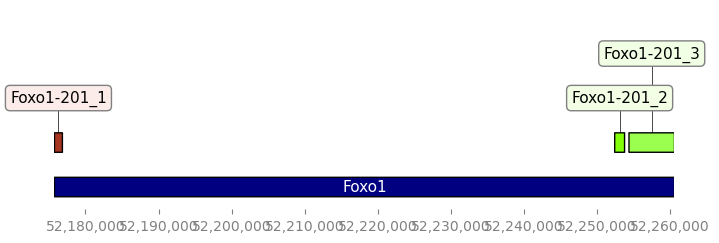

In [23]:
mouse.annotations.with_gene_name_contains("Foxo1").genes_visual(mouse.genome)[0].plot()

# Other genomes
If you want to get custom Ensembl assembly, you can initialize it yourself.
We use genopy under the hood to do download and search
For example let's select on of cow genomes

In [24]:
from genotations import ensembl
cow = ensembl.species["Bos_taurus"]

In [25]:
cow.annotations.annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon,exon_number,transcript_exon
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,str,u64,str
"""1""","""ensembl""","""gene""",339070,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,null,null,null,null,null,null
"""1""","""ensembl""","""transcript""",339070,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null,null,null
"""1""","""ensembl""","""exon""",350267,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,"""ENSBTAE0000051...",1,null
"""1""","""ensembl""","""CDS""",350267,350389,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null,1,null
"""1""","""ensembl""","""start_codon""",350387,350389,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null,1,null
"""1""","""ensembl""","""exon""",346602,346924,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,"""ENSBTAE0000006...",2,null
"""1""","""ensembl""","""CDS""",346602,346924,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null,2,null
"""1""","""ensembl""","""exon""",342547,342721,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,"""ENSBTAE0000047...",3,null
"""1""","""ensembl""","""CDS""",342547,342721,""".""","""-""","""1""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null,3,null


(<AxesSubplot: >,
 ({GF(FOXO1, 21900230-21991693 (1)): 0,
   GF(FOXO1-201_1, 21900230-21900960 ): 1.0,
   GF(FOXO1-201_2, 21901144-21901361 ): 1.0,
   GF(FOXO1-201_3, 21988870-21990226 ): 1.0,
   GF(FOXO1-201_4, 21990694-21991693 ): 1.0},
  {GF(FOXO1-201_3, 21988870-21990226 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_4, 21990694-21991693 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(FOXO1-201_1, 21900230-21900960 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_2, 21901144-21901361 ): {'feature_y': 1.0,
    'annotation_y': 3.0}}))

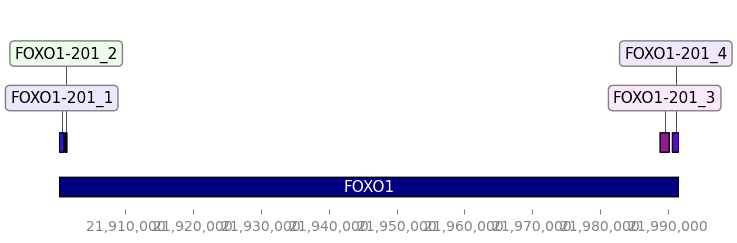

In [26]:
cow.annotations.with_gene_name_contains("FOXO1").genes_visual(cow.genome)[0].plot()

## Extend gene or transcript expression with feature and sequence information

In [27]:
from genotations.quantification import *

In [28]:
expressions = pl.read_parquet(str(data / "PRJNA543661_transcripts.parquet"))
expressions

transcript,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319
str,f64,f64,f64,f64,f64,f64
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000019...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000019...",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST0000017...",0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
with_expressions_summaries(expressions, min_avg_value = 1)

transcript,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319,sum_TPM,avg_TPM
str,f64,f64,f64,f64,f64,f64,f64,f64
"""ENSMUST0000008...",51402.680674,56580.70452,55664.676759,52401.340584,47473.629331,49060.764263,312583.796131,52097.299355
"""ENSMUST0000018...",19676.999212,19434.871789,22760.88867,16397.931394,18245.143152,18753.311916,115269.146133,19211.524356
"""ENSMUST0000022...",16742.068951,16529.718368,16175.696122,17681.900143,19585.856418,22166.156102,108881.396104,18146.899351
"""ENSMUST0000011...",11057.544635,7900.532889,11868.707526,17289.49997,15998.877962,21687.356475,85802.519457,14300.419909
"""ENSMUST0000012...",12830.31681,11606.327118,13425.557301,13310.650102,13546.985701,14931.569663,79651.406695,13275.234449
"""ENSMUST0000017...",7073.435975,6909.161714,7750.666221,9266.199011,9618.407732,9798.51455,50416.385203,8402.730867
"""ENSMUST0000004...",7340.308323,7825.27558,7811.268633,7637.342655,7882.101002,7930.875465,46427.171658,7737.861943
"""ENSMUST0000008...",7366.565203,7763.058704,7941.216947,7413.65407,6929.471648,7280.120767,44694.087339,7449.014557
"""ENSMUST0000008...",6368.531742,7194.357054,7830.050186,7552.675006,7082.670636,7497.24198,43525.526604,7254.254434


In [30]:
expressions_ext = mouse.annotations.extend_with_annotations_and_sequences(expressions.head(10), mouse.genome)
expressions_ext

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon,exon_number,transcript_exon,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319,coordinates,sequence
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,str,u64,str,f64,f64,f64,f64,f64,f64,list[str],str
"""6""","""ensembl_havana...","""transcript""",41510135,41510146,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trbd1""","""TR_D_gene""","""ENSMUST0000017...","""Trbd1-201""",null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41510146""]","""GGGACAGGGGGC"""
"""6""","""ensembl_havana...","""exon""",41510135,41510146,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trbd1""","""TR_D_gene""","""ENSMUST0000017...","""Trbd1-201""","""ENSMUSE0000147...",1,"""Trbd1-201_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41510146""]","""GGGACAGGGGGC"""
"""6""","""ensembl_havana...","""CDS""",41510135,41510146,""".""","""+""","""0""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trbd1""","""TR_D_gene""","""ENSMUST0000017...","""Trbd1-201""",null,1,"""Trbd1-201_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41510146""]","""GGGACAGGGGGC"""
"""6""","""ensembl_havana...","""transcript""",41519097,41519110,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trbd2""","""TR_D_gene""","""ENSMUST0000017...","""Trbd2-201""",null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41519110""]","""GGGACTgggggggC..."
"""6""","""ensembl_havana...","""exon""",41519097,41519110,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trbd2""","""TR_D_gene""","""ENSMUST0000017...","""Trbd2-201""","""ENSMUSE0000147...",1,"""Trbd2-201_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41519110""]","""GGGACTgggggggC..."
"""6""","""ensembl_havana...","""CDS""",41519097,41519110,""".""","""+""","""0""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trbd2""","""TR_D_gene""","""ENSMUST0000017...","""Trbd2-201""",null,1,"""Trbd2-201_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41519110""]","""GGGACTgggggggC..."
"""14""","""havana""","""transcript""",54350925,54350933,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trdd1""","""TR_D_gene""","""ENSMUST0000019...","""Trdd1-202""",null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,"[""14"", ""+"", ... ""54350933""]","""ATGGCATAT"""
"""14""","""havana""","""exon""",54350925,54350933,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trdd1""","""TR_D_gene""","""ENSMUST0000019...","""Trdd1-202""","""ENSMUSE0000147...",1,"""Trdd1-202_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""14"", ""+"", ... ""54350933""]","""ATGGCATAT"""
"""14""","""havana""","""CDS""",54350925,54350933,""".""","""+""","""0""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Trdd1""","""TR_D_gene""","""ENSMUST0000019...","""Trdd1-202""",null,1,"""Trdd1-202_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""14"", ""+"", ... ""54350933""]","""ATGGCATAT"""


In [31]:
expressions_ext.select(pl.col("sequence"))

sequence
str
"""GGGACAGGGGGC"""
"""GGGACAGGGGGC"""
"""GGGACAGGGGGC"""
"""GGGACTgggggggC..."
"""GGGACTgggggggC..."
"""GGGACTgggggggC..."
"""ATGGCATAT"""
"""ATGGCATAT"""
"""ATGGCATAT"""


# If we need to extend only with essential info and exons only

In [32]:
expressions_ext_smaller = mouse.annotations.with_genes_transcripts_exons_coordinates_only().extend_with_annotations_and_sequences(expressions, mouse.genome)
expressions_ext_smaller

There are (780104, 14) annotations, loading sequences can take quite a while!


gene,gene_name,transcript,transcript_name,exon,exon_number,transcript_exon,coordinates,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319,sequence
str,str,str,str,str,u64,str,list[str],f64,f64,f64,f64,f64,f64,str
"""ENSMUSG0000010...","""Gm19087""","""ENSMUST0000019...","""Gm19087-201""","""ENSMUSE0000132...",1,"""Gm19087-201_1""","[""1"", ""+"", ... ""150984611""]",0.0,0.0,0.0,0.0,0.0,0.0,"""TGTTGCTATGGACT..."
"""ENSMUSG0000009...","""Gm8941""","""ENSMUST0000018...","""Gm8941-201""","""ENSMUSE0000115...",1,"""Gm8941-201_1""","[""1"", ""+"", ... ""151012971""]",0.0,0.0,0.0,0.0,0.0,0.307963,"""ATGGTCTACATGTT..."
"""ENSMUSG0000009...","""Gm8941""","""ENSMUST0000018...","""Gm8941-201""","""ENSMUSE0000111...",2,"""Gm8941-201_2""","[""1"", ""+"", ... ""151013531""]",0.0,0.0,0.0,0.0,0.0,0.307963,"""GGCTACACTAAGAA..."
"""ENSMUSG0000010...","""Gm7449""","""ENSMUST0000019...","""Gm7449-201""","""ENSMUSE0000133...",1,"""Gm7449-201_1""","[""1"", ""+"", ... ""6981446""]",0.119103,0.257547,0.0,0.154863,0.0,0.0,"""ATGGGCAAAGGAGA..."
"""ENSMUSG0000010...","""Gm28283""","""ENSMUST0000018...","""Gm28283-201""","""ENSMUSE0000132...",1,"""Gm28283-201_1""","[""1"", ""-"", ... ""108540244""]",0.0,0.0,0.0,0.0,0.0,0.0,"""ATATCTTTGCTCCA..."
"""ENSMUSG0000010...","""Gm37108""","""ENSMUST0000019...","""Gm37108-201""","""ENSMUSE0000133...",1,"""Gm37108-201_1""","[""1"", ""+"", ... ""6987219""]",0.722537,0.188472,0.854944,0.803678,0.719618,0.200622,"""ATGGGCATCTCTCG..."
"""ENSMUSG0000010...","""Gm37108""","""ENSMUST0000019...","""Gm37108-201""","""ENSMUSE0000134...",2,"""Gm37108-201_2""","[""1"", ""+"", ... ""6993812""]",0.722537,0.188472,0.854944,0.803678,0.719618,0.200622,"""aagaaatacgacaa..."
"""ENSMUSG0000010...","""Gm37275""","""ENSMUST0000019...","""Gm37275-201""","""ENSMUSE0000133...",1,"""Gm37275-201_1""","[""1"", ""+"", ... ""7000012""]",0.0,0.0,0.0,0.0,0.0,0.0,"""CCACCTGACAGAGG..."
"""ENSMUSG0000010...","""Gm6679""","""ENSMUST0000019...","""Gm6679-201""","""ENSMUSE0000133...",1,"""Gm6679-201_1""","[""1"", ""+"", ... ""108699733""]",0.0,0.0,0.0,0.0,0.0,0.0,"""atGTCAAAAGGTGT..."


In [33]:
mouse_foxo_coding_exons = mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().exons()#getting only coding Foxo1 transcripts
mouse_foxo_coding_transcripts.with_sequences(mouse.genome).annotations_df

NameError: name 'mouse_foxo_coding_transcripts' is not defined

In [ ]:
mouse_foxo_coding_transcripts.with_sequences(mouse.genome).annotations_df

In [ ]:
mouse_foxo_coding_transcripts.annotations_df

In [ ]:
mouse_foxo_coding_transcripts.with_sequences(mouse.genome).with_genes_transcripts_coordinates_only().annotations_df

In [ ]:
mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().with_sequences(mouse.genome, Strand.Minus).with_genes_transcripts_exons_coordinates_only().annotations_df

## Plot features

In [ ]:
mouse.annotations.with_gene_name_contains("Foxo1").genes_visual(mouse.genome)[0].plot()

# Other genomes
If you want to get custom Ensembl assembly, you can initialize it yourself.
We use genopy under the hood to do download and search
For example let's select on of cow genomes

In [ ]:
cow_assemblies = ensembl.search_assemblies("Bos taurus")
cow_assemblies

In [ ]:
cow1 = ensembl.SpeciesInfo("Cow", cow_assemblies[-1][0])
cow1.annotations.annotations_df

(<AxesSubplot: >,
 ({GF(FOXO1, 21900230-21991693 (1)): 0,
   GF(FOXO1-201_1, 21900230-21900960 ): 1.0,
   GF(FOXO1-201_2, 21901144-21901361 ): 1.0,
   GF(FOXO1-201_3, 21988870-21990226 ): 1.0,
   GF(FOXO1-201_4, 21990694-21991693 ): 1.0},
  {GF(FOXO1-201_3, 21988870-21990226 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_4, 21990694-21991693 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(FOXO1-201_1, 21900230-21900960 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_2, 21901144-21901361 ): {'feature_y': 1.0,
    'annotation_y': 3.0}}))

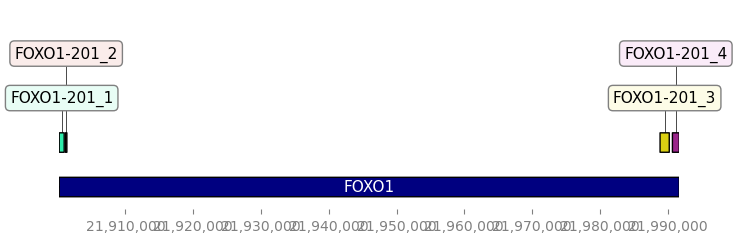

In [34]:
cow1.annotations.with_gene_name_contains("FOXO1").genes_visual(cow1.genome)[0].plot()

## Extend gene or transcript expression with feature and sequence information

In [35]:
expressions = pl.read_parquet(str(data / "PRJNA543661_transcripts.parquet"))
expressions

transcript,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319
str,f64,f64,f64,f64,f64,f64
"""ENSMUST00000178537""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000178862""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000196221""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000179664""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000177564""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000179520""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000179883""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000195858""",0.0,0.0,0.0,0.0,0.0,0.0
"""ENSMUST00000179932""",0.0,0.0,0.0,0.0,0.0,0.0


If you need average and sum TPMs:

In [36]:
with_expressions_summaries(expressions)

transcript,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319,sum_TPM,avg_TPM
str,f64,f64,f64,f64,f64,f64,f64,f64
"""ENSMUST00000082407""",51402.680674,56580.70452,55664.676759,52401.340584,47473.629331,49060.764263,312583.796131,52097.299355
"""ENSMUST00000188837""",19676.999212,19434.871789,22760.88867,16397.931394,18245.143152,18753.311916,115269.146133,19211.524356
"""ENSMUST00000227614""",16742.068951,16529.718368,16175.696122,17681.900143,19585.856418,22166.156102,108881.396104,18146.899351
"""ENSMUST00000118430""",11057.544635,7900.532889,11868.707526,17289.49997,15998.877962,21687.356475,85802.519457,14300.419909
"""ENSMUST00000121411""",12830.31681,11606.327118,13425.557301,13310.650102,13546.985701,14931.569663,79651.406695,13275.234449
"""ENSMUST00000176683""",7073.435975,6909.161714,7750.666221,9266.199011,9618.407732,9798.51455,50416.385203,8402.730867
"""ENSMUST00000042235""",7340.308323,7825.27558,7811.268633,7637.342655,7882.101002,7930.875465,46427.171658,7737.861943
"""ENSMUST00000082408""",7366.565203,7763.058704,7941.216947,7413.65407,6929.471648,7280.120767,44694.087339,7449.014557
"""ENSMUST00000082409""",6368.531742,7194.357054,7830.050186,7552.675006,7082.670636,7497.24198,43525.526604,7254.254434


In [37]:
expressions_ext = mouse.annotations.extend_with_annotations_and_sequences(expressions.head(10), mouse.genome)
expressions_ext

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon,exon_number,transcript_exon,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319,coordinates,sequence
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,str,u64,str,f64,f64,f64,f64,f64,f64,list[str],str
"""6""","""ensembl_havana""","""transcript""",41510135,41510146,""".""","""+""",""".""","""gene_id ""ENSMUSG00000095668""; gene_version ""2""; transcript_id ""ENSMUST00000178537""; transcript_version ""2""; gene_name ""Trbd1""; gene_source ""ensembl_havana""; gene_biotype ""TR_D_gene""; transcript_name ""Trbd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""TR_D_gene""; tag ""cds_end_NF""; tag ""cds_start_NF""; tag ""mRNA_end_NF""; tag ""mRNA_start_NF""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000095668""","""Trbd1""","""TR_D_gene""","""ENSMUST00000178537""","""Trbd1-201""",null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41510146""]","""GGGACAGGGGGC"""
"""6""","""ensembl_havana""","""exon""",41510135,41510146,""".""","""+""",""".""","""gene_id ""ENSMUSG00000095668""; gene_version ""2""; transcript_id ""ENSMUST00000178537""; transcript_version ""2""; exon_number ""1""; gene_name ""Trbd1""; gene_source ""ensembl_havana""; gene_biotype ""TR_D_gene""; transcript_name ""Trbd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""TR_D_gene""; exon_id ""ENSMUSE00001470508""; exon_version ""2""; tag ""cds_end_NF""; tag ""cds_start_NF""; tag ""mRNA_end_NF""; tag ""mRNA_start_NF""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000095668""","""Trbd1""","""TR_D_gene""","""ENSMUST00000178537""","""Trbd1-201""","""ENSMUSE00001470508""",1,"""Trbd1-201_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41510146""]","""GGGACAGGGGGC"""
"""6""","""ensembl_havana""","""CDS""",41510135,41510146,""".""","""+""","""0""","""gene_id ""ENSMUSG00000095668""; gene_version ""2""; transcript_id ""ENSMUST00000178537""; transcript_version ""2""; exon_number ""1""; gene_name ""Trbd1""; gene_source ""ensembl_havana""; gene_biotype ""TR_D_gene""; transcript_name ""Trbd1-201""; transcript_source ""ensembl_havana""; transcript_biotype ""TR_D_gene""; protein_id ""ENSMUSP00000141764""; protein_version ""2""; tag ""cds_end_NF""; tag ""cds_start_NF""; tag ""mRNA_end_NF""; tag ""mRNA_start_NF""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000095668""","""Trbd1""","""TR_D_gene""","""ENSMUST00000178537""","""Trbd1-201""",null,1,"""Trbd1-201_1""",0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41510146""]","""GGGACAGGGGGC"""
"""6""","""ensembl_havana""","""transcript""",41519097,41519110,""".""","""+""",""".""","""gene_id ""ENSMUSG00000094569""; gene_version ""2""; transcript_id ""ENSMUST00000178862""; transcript_version ""2""; gene_name ""Trbd2""; gene_source ""ensembl_havana""; gene_biotype ""TR_D_gene""; transcript_name ""Trbd2-201""; transcript_source ""ensembl_havana""; transcript_biotype ""TR_D_gene""; tag ""cds_end_NF""; tag ""cds_start_NF""; tag ""mRNA_end_NF""; tag ""mRNA_start_NF""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA (assigned to previous version 1)"";""","""ENSMUSG00000094569""","""Trbd2""","""TR_D_gene""","""ENSMUST00000178862""","""Trbd2-201""",null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,"[""6"", ""+"", ... ""41519110""]","""GGGACTgggggggC"""
"""6""","""ensembl_havana""","""exon""",41519097,41519110,""".""","""+""",""".""","""gene_id ""ENSMUSG00000094569""; gene_version ""2""; transcript_id ""ENSMUST00000178862""; transcript_version ""2""; exon_number ""1""; gene_name ""Trbd2""; gene_source ""ensembl_havana""; gene_biotype ""TR_D_gene""; transcript_name ""Trbd2-201""; transcript_source ""ensembl_havana""; tran

# If we need to extend only with essential info and exons only

In [38]:
expressions_ext_smaller = mouse.annotations.with_genes_transcripts_exons_coordinates_only().extend_with_annotations_and_sequences(expressions, mouse.genome)
expressions_ext_smaller

There are (780104, 13) annotations, loading sequences can take quite a while!


gene,gene_name,transcript,transcript_name,exon,transcript_exon,coordinates,SRR9089320,SRR9089321,SRR9089322,SRR9089323,SRR9089324,SRR9089319,sequence
str,str,str,str,str,str,list[str],f64,f64,f64,f64,f64,f64,str
"""ENSMUSG00000100595""","""Gm19087""","""ENSMUST00000191430""","""Gm19087-201""","""ENSMUSE00001324949""","""Gm19087-201_1""","[""1"", ""+"", ... ""150984611""]",0.0,0.0,0.0,0.0,0.0,0.0,"""TGTTGCTATGGACTGTGTATGATGTCCTTCCAACTTAAGAGAGAGAGGCATTACTTCATGTATATATTTTTAGGTCACACCCATCTTACCCTTGGTTCTTCTGATGCTTGGGATTAATAGTCCAGCATTGCAGATACaaaaaaaaaaaaaaaaaGACCCTGATATTATATATAAAGAGGGGAATTTGCATTCTAAATTGTTGGGGACCATTCCTCCTAGGAGAAACAGttttttttttttttttttttttttttttttttttttttttttttttACAAGAAGTCAGAAATCTTGTTGTTACTGCTGAAGAACAGAGACTATCCCCTGGCCGTGGGCTCAATCCCAGGAGGTGTCTTAGAGGATATGAAAATTTGCTCTTGGACTAAAACTCTAAGCATCAGAATGTAATGTTGATAGAAACAGTGAGCATCCCTCTACACCCTCAAATGTTGAGCGTCCATTAGATGGAAAGATTTTATATGTCAAAAAGATTCCAGTATGGGATTTCATTTTGAACAAGATCTTAACAAGAAATCAGTGGCCACTTTAGTATTGGGTATGCTTCTCCAGTACACAGTGACACCTGAAAGCAACTGGCAGAGAAGTTGGTGGTGACAGGTGGCACCTCTGTGTTACCAGGATCTTCACAGATCATAAACAGAAGGGACTTGGtaaatatataactatataaatataAAACAATTTGTGACCCCAAGGCACTCTGAATTCATATTCCTCCTGCAGAGGCTCATTCTTTAACCTGGTTGGGAGGGATTAGTTTGGAACCATCACAAGGTATCCTTAAGAACCATTCAGCTTCAAAAGAATATTGTAATTAGATGGGCTGTATACGGATTGGGGTTTTCTCAACAAATCACTGTTAGAAACAGTATTTAATATGGGAAATTACAGTCACCGCTGATGAAGAGAGTGTTTTCCATTGAGA"""
"""ENSMUSG00000097426""","""Gm8941""","""ENSMUST00000181451""","""Gm8941-201""","""ENSMUSE00001158900""","""Gm8941-201_1""","[""1"", ""+"", ... ""151012971""]",0.0,0.0,0.0,0.0,0.0,0.307963,"""ATGGTCTACATGTTCCAGTATGACTCTCTACCCATGACAAGTTCAACGGCATAGTCAAGGCTGAGAATGGGAAGCTTGCCATCAACAGGAAGGCCATCACTTTCTTCCAGGAGTGGGATCTCACTAACATCAAATGGGGTGACGCTGTTGCTGAGTATGTTGTGTAGTGTACTGGCATCTTTACCACCATGGAGAAGGCTGGGGACCACTTGAAGAGTGGTGCCAAAAGAGTTATTATATCTGTCCCTTCTGCTGATGTTCCCATGTTTGTGATGGGTGTGAACCACAAGAAGTATGTCTGCAACACAAAATTGTCTGCAATGCTTCCTGCACCACCAACTGCTTAGCCCCACCCACCCCCTTGCCAAGGTCATCCATGACAACTTTGGCATTGTGGAAGGATTCCTTACCACAGTCGATGCCATCACTGCCACCCAGAAGACTGTGGATTGTCCCTCTGGAAAGCTGTGGCGTGATGGCCAAGGGACTGCCCAGAACATCATCCCTGCATCCACTGGTGATGTCAAGACTGTGGGCAAGGTCATCCCAGAGCTGAACAGGAAGCTCACTGTCATGGCCTTCCATGTTCCTACCCCCAATGTATCCGTTGTAGATCTATCATGCCGCCTAGAGAAACCTGCCAAGTATGATGACATCAAGAAAGTGGTGAAGCAGGCATCCTGGGGCCTACTAAAGGGCACTCTGGGATtgtac"""
"""ENSMUSG00000097426""","""Gm8941""","""ENSMUST00000181451""","""Gm8941-201""","""ENSMUSE00001115039""","""Gm8941-201_2""","[""1"", ""+"", ... ""151013531""]",0.0,0.0,0.0,0.0,0.0,0.307963,"""GGCTACACTAAGAACCAGGTTGTCTCCTGCGACTTCAACAGTAACTCCCACTCTTCCACCTTTGATGCTGGGACTGGCATTGTTCTCACTGACAACTTTGTAAAGCCCATTTCCTGTTATGACAATGAATATGGCTACAGCAGCAGGGTGGTAGACCTCATGGCCTACATAGCCTCAAGGAGTAA"""
"""ENSMUSG00000104385""","""Gm7449""","""ENSMUST00000194393""","""Gm7449-201""","""ENSMUSE00001339893""","""Gm7449-201_1""","[""1"", ""+"", ... ""6981446""]",0.119103,0.257547,0.0,0.154863,0.0,0.0,"""ATGGGCAAAGGAGACCTTAAGAAACCAAGAGGCAAAACGTCCTCCTCATATACATGCTTTGTGCAAACCTGTTGGGAGAAGCACAAGAAGAAGCACCTGGATGCTTCAGTCAACTTCTCAGAGTTCTCCAAGAAGTGCTCAGAGAAGTGGAAGACCATGTCTGCTaaaaaaaaaaaaaaaGTGGGGGGAGGGATTTGAACATATGGCAAAGGCTGACAAGGCTCGTTATGAAAGAGAAATGAAAACCTACATCCCTCCCAAAGGGGAGACCAGAAAGAAGTTCAAGGACCCCAATGCACCCAAGAAGCTTACTTTGGCCTTCTTCTTGCTCTGTTCTAAGTACCGCTCCAAAATTAAAGGCGAGCATCCTGGCTTTTTCATTGGTGATGTTGCAAAGAAACTAGGAAAGATGTGGAATAACACTGCAGTGGATGACAAGCAGCCCTATGAGAAGAAGGCTGTCAAGCTGAAGGAGAAGTACAAGAAGAATATTGCTGCCTACAGAGATGAAGGAAAACCTGATGCAGTgaaaagagggtggtcaaggctgaaaagagcaagaaaaagaaggaagaggaagatgaggaggaggatgaagagcatgaggaagaggagtaagaagaagagatgaagatgatgatgaagaagatgatgatgaataag"""
"""ENSMUSG00000101231""","""Gm28283""","""ENSMUST00000185509""","""Gm28283-201""","""ENSMUSE00001325295""","""Gm28283-201_1""","[""1"", ""-"", ... ""108540244""]",0.0,0.0,0.0,0.0,0.0,0.0,"""CTGCAAAGAATGTAAGAATTGAGCTTGATTACATTAAATGTGACTGTTTGAAATGGAAAAAACACATCTTTGGTGTTTTCAAATTGAAGGAGATGATCATTTTCATTATTTGTGTCCCCTTTAACTTCTGCTTGAGCAAGCAACagagaggaggagagagagGCTGGAGCAAAGATAT"""
"""ENSMUSG00000102135""","""Gm37108""","""ENSMUST00000194605""","""Gm37108-201""","""ENSMUSE00001339810""","""Gm37108-